In [ ]:
# 1) ABBA   -> HIP HIP -> Slow   -> TECH
# 2) ABBA   -> TECH    -> HIPHOP -> SLOW
# 3) HIPHOP -> TECH    -> ABBA   -> SLOW

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### Experiment 1

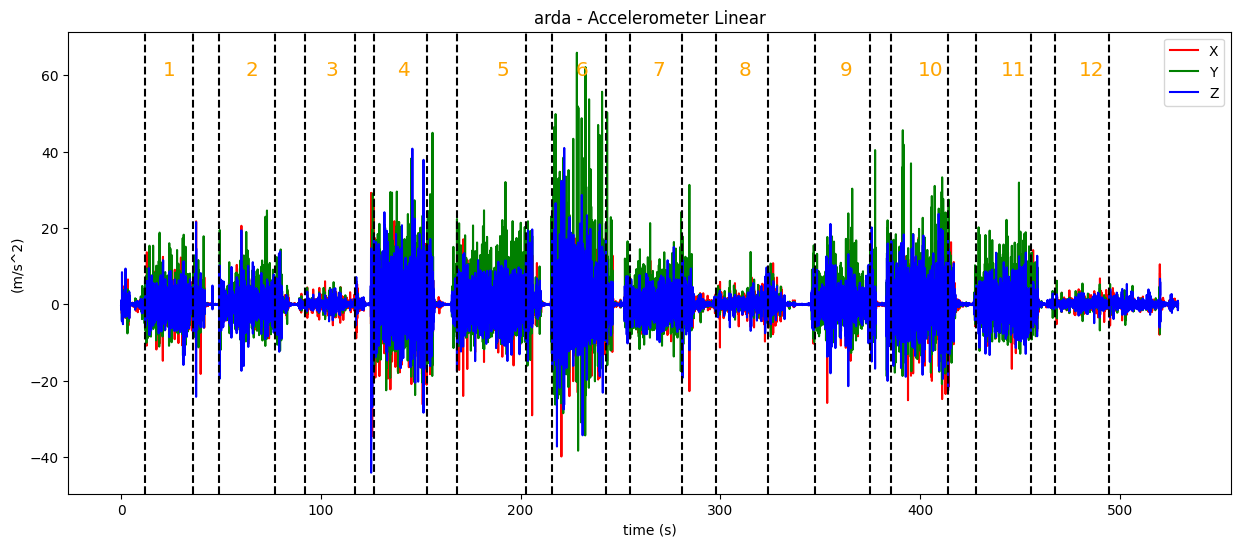

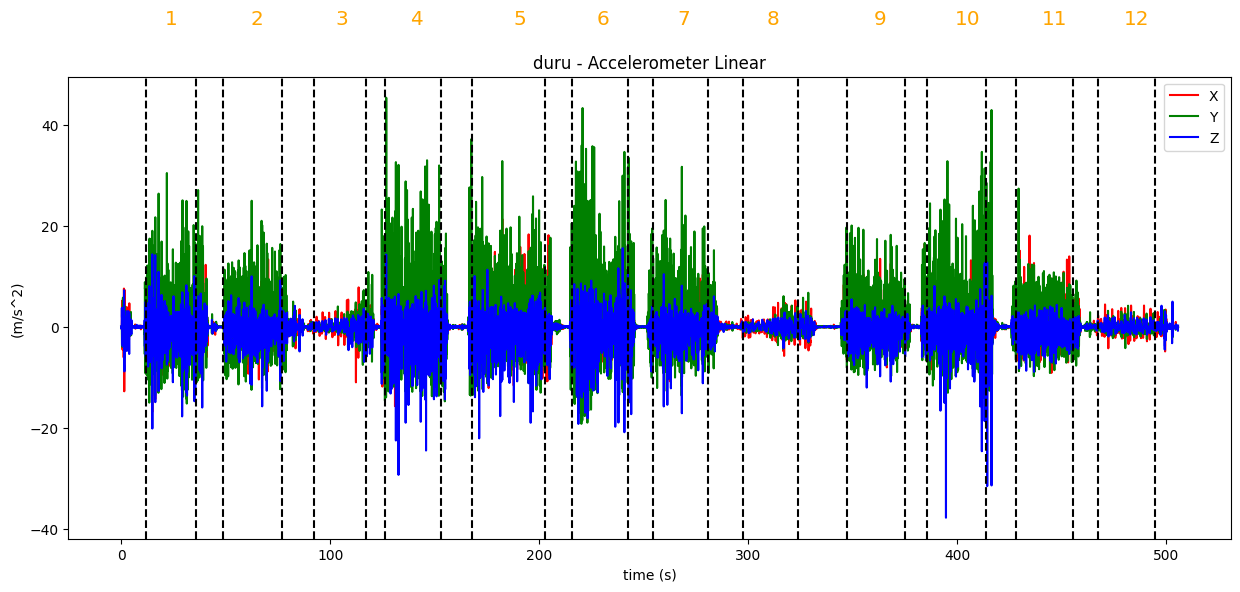

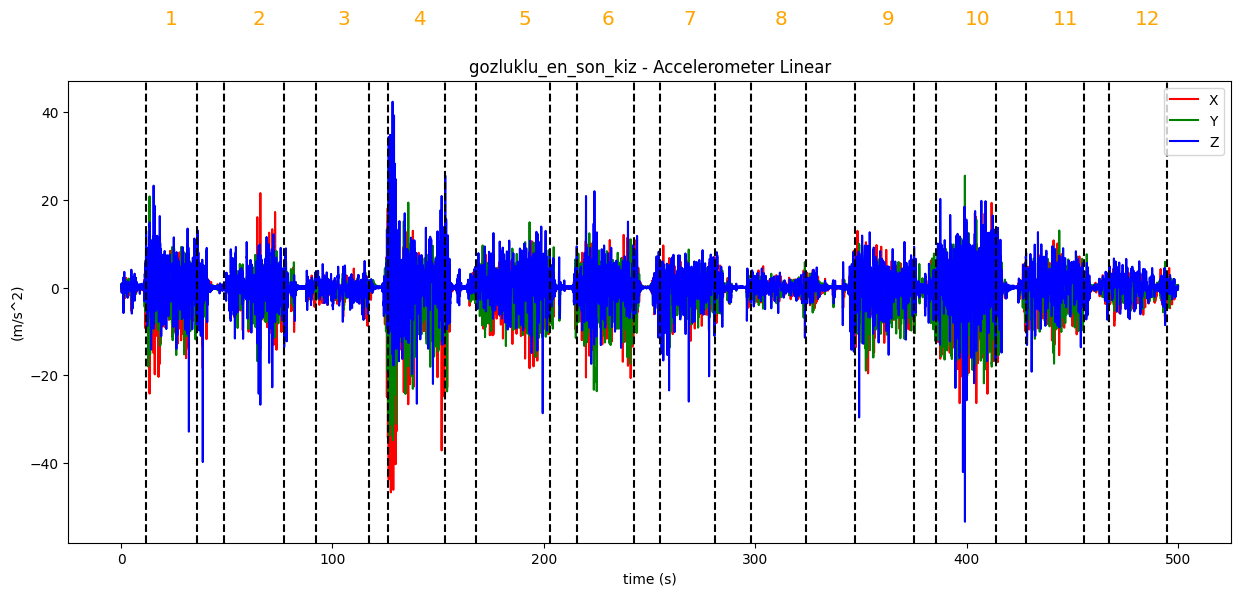

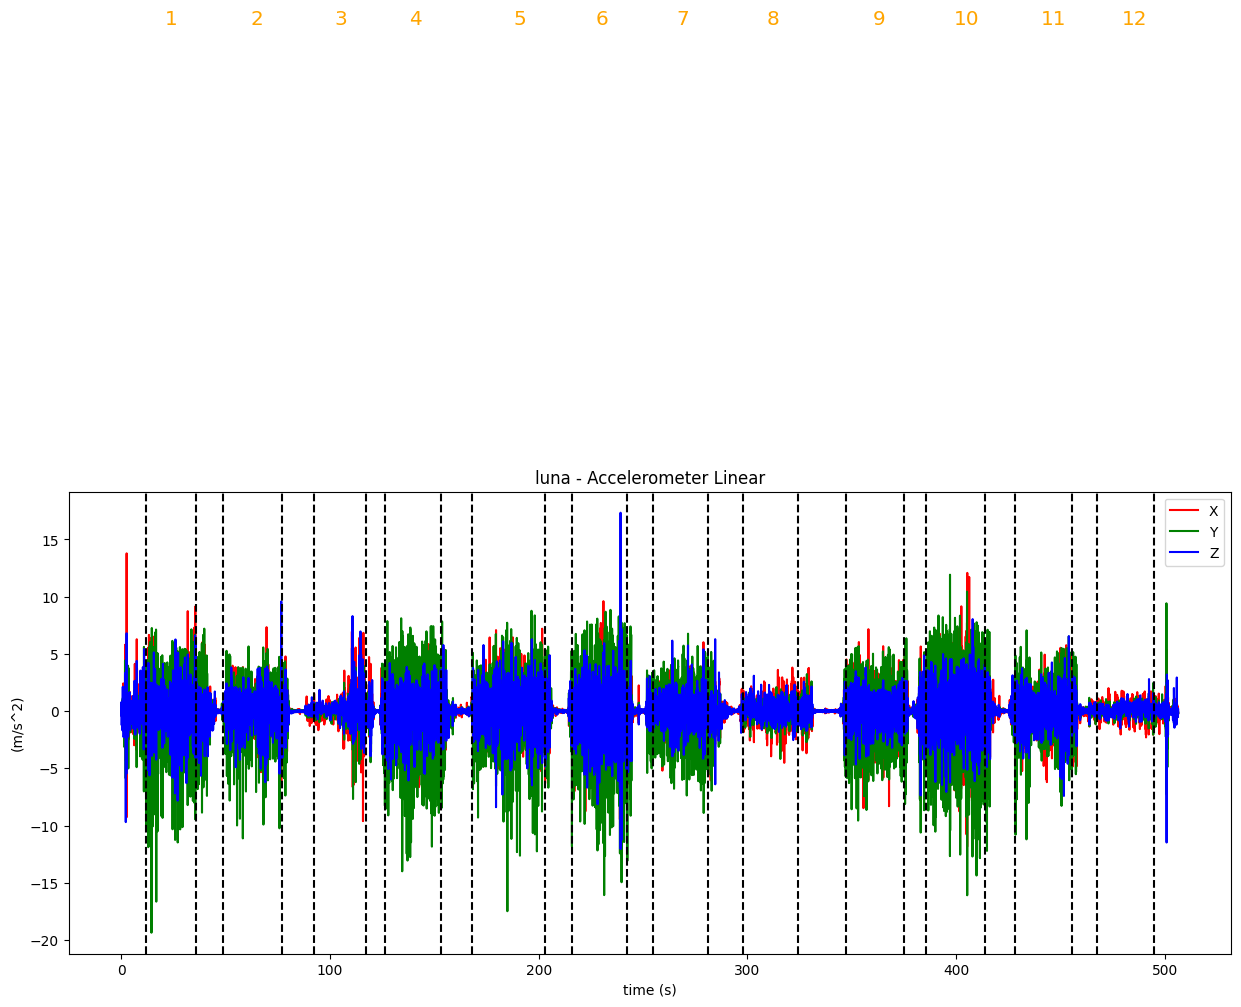

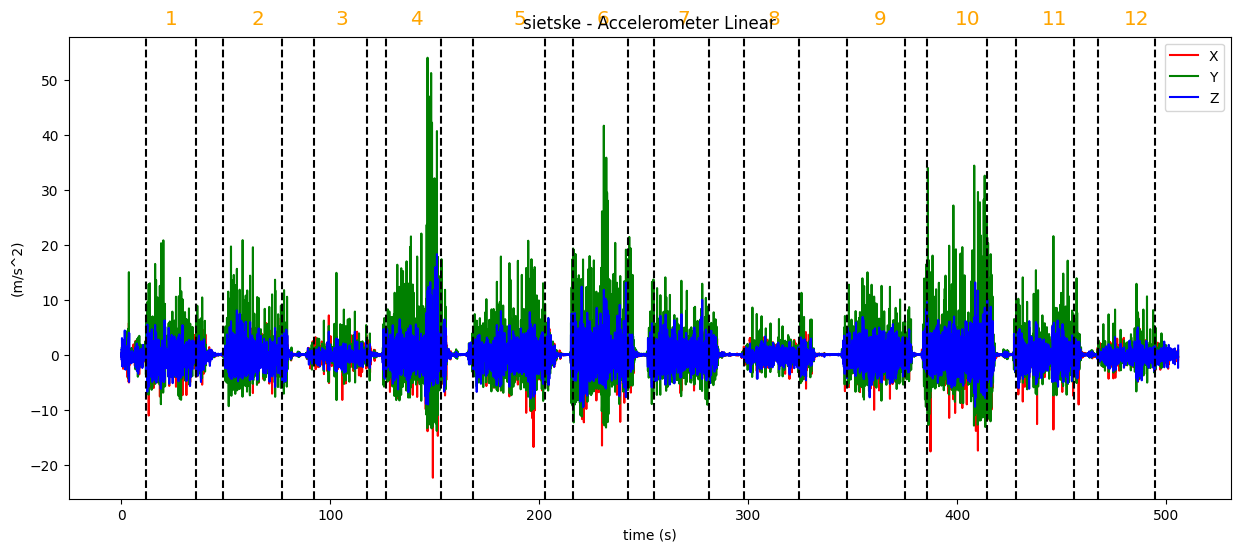

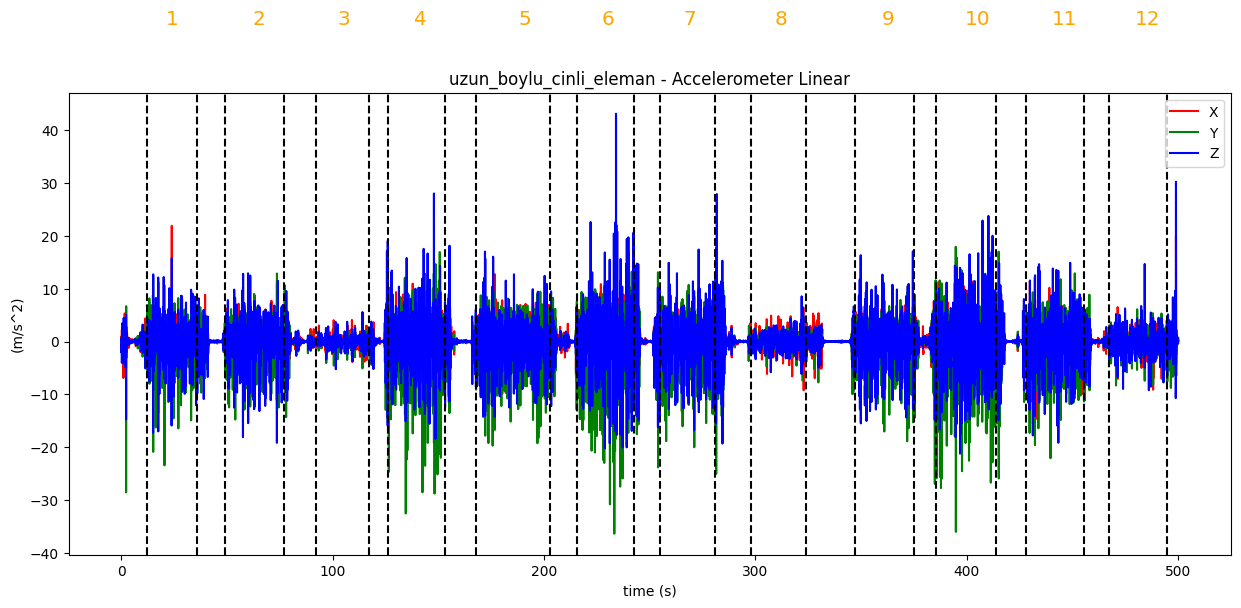

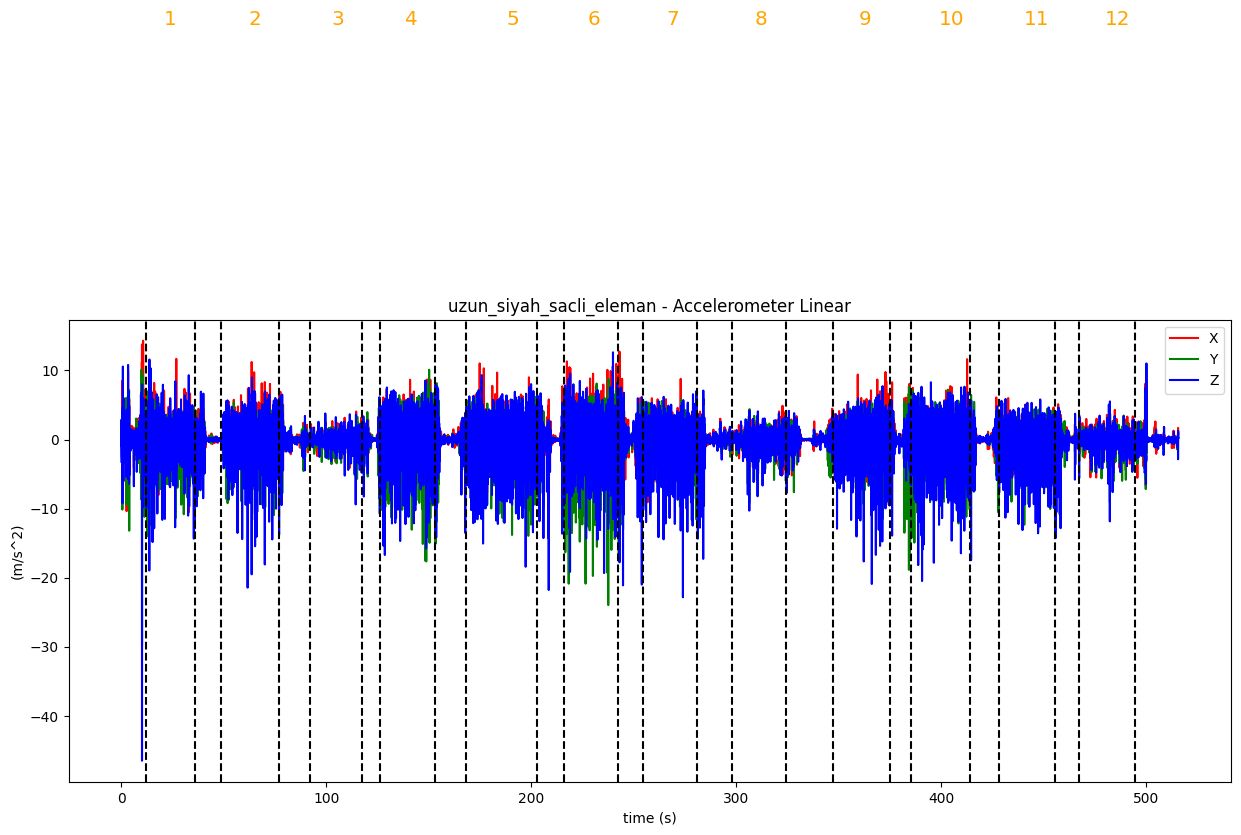

In [116]:
subject_names = ['arda','duru','gozluklu_en_son_kiz','luna','sietske','uzun_boylu_cinli_eleman','uzun_siyah_sacli_eleman']

for subject_id,SUBJECT in enumerate(subject_names):

    t_start = 12

    DATA_PATH = f".\\data\\working_data\\{SUBJECT}\\"
    INTERVALS = [0, 23.88, 36.85, 65.03, 80.17, 105.3, 114.42, 141.12, 156.04, 190.84, 203.86, 230.52, 242.71, 
                268.97, 285.81, 312.12, 335.37, 362.99, 373.56, 401.96, 416.22, 443.57, 455.41, 482.69]

    accelerometer_linear = pd.read_csv(f"{DATA_PATH}Linear Accelerometer.csv")
    gyroscope = pd.read_csv(f"{DATA_PATH}Gyroscope.csv")
    location = pd.read_csv(f"{DATA_PATH}Location.csv")
    magnetometer = pd.read_csv(f"{DATA_PATH}Magnetometer.csv")

    plt.figure(figsize=(15, 6))
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['X (m/s^2)'], color='r', label='X')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Y (m/s^2)'], color='g', label='Y')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Z (m/s^2)'], color='b', label='Z')
    [plt.axvline(x=_x+t_start, ls='--', lw=1.5, c='black') for _x in INTERVALS]
    [plt.text(_x+t_start-15, 60, f"{_y+1}", fontsize='x-large', color='orange') for _x,_y in zip(INTERVALS[1::2], range(12))]
    plt.title(f"{SUBJECT} - Accelerometer Linear")
    plt.xlabel('time (s)')
    plt.ylabel('(m/s^2)')
    plt.legend(loc='upper right')
    # plt.savefig(f"{SUBJECT}_accelerometer_linear.png", bbox_inches='tight')
    # plt.xlim([10, 100])
    plt.show()

    intervals_list = np.array([_x+t_start for _x in INTERVALS])

    merged_df = accelerometer_linear.merge(gyroscope).merge(magnetometer)
    merged_df['name'] = SUBJECT
    merged_df['id'] = subject_id
    merged_df['label'] = 0

    for idx in np.arange(len(intervals_list)//2):
        start = intervals_list[(idx*2)]
        end = intervals_list[(idx*2)+1]
        merged_df.loc[(merged_df['Time (s)']>=start)&(merged_df['Time (s)']<=end),'label'] = idx + 1

    save_pd = merged_df[merged_df['label']!=0]
    save_pd.to_csv(f"id_{subject_id}.csv")

In [134]:
pd_list = []

for subject_id,SUBJECT in enumerate(subject_names):
    tmp = pd.read_csv(f"id_{subject_id}.csv",index_col=0)
    pd_list.append(tmp)

In [135]:
final_pd = pd.concat(pd_list)
final_pd

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),X (µT),Y (µT),Z (µT),name,id,label
796,12.012569,0.258931,0.017263,0.672928,-2.439607,-0.878965,-0.619673,-10.723785,-66.139923,30.020233,arda,0,1
797,12.027645,0.028201,-1.215214,0.697732,-2.547378,-0.708728,-0.647140,-9.534470,-67.187988,26.801422,arda,0,1
798,12.042721,0.551394,-3.467114,0.475736,-2.526115,-0.628574,-0.724171,-9.050598,-67.933258,25.146561,arda,0,1
799,12.057797,1.021958,-4.520315,0.221283,-2.360137,-0.418874,-0.767595,-7.907578,-69.015503,21.563385,arda,0,1
800,12.072873,1.894479,-6.195497,0.044461,-2.042278,-0.238945,-0.795367,-7.298889,-69.457855,20.037476,arda,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32937,494.625906,0.043067,0.351477,-0.006649,0.016542,-0.398316,-0.087654,-3.465305,50.365746,6.448685,uzun_siyah_sacli_eleman,6,12
32938,494.640923,0.127661,0.192405,0.121043,0.071068,-0.650885,-0.016586,-3.714901,50.516914,6.604454,uzun_siyah_sacli_eleman,6,12
32939,494.655939,0.231820,0.124691,0.293192,0.156772,-0.832202,0.004958,-4.096218,50.444199,6.763824,uzun_siyah_sacli_eleman,6,12
32940,494.670956,0.424360,-0.015040,0.580191,0.269975,-0.946084,-0.008308,-4.216789,50.455944,6.889381,uzun_siyah_sacli_eleman,6,12


In [136]:
final_pd.columns = ['time','acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','mag_x','mag_y','mag_z','subject_name','subject_id','label']

In [137]:
final_pd['genre'] = np.where(final_pd['label'].isin([1,5,11]), 'POP',
                             np.where(final_pd['label'].isin([2,7,9]), 'HIPHOP',
                                      np.where(final_pd['label'].isin([3,8,12]), 'SLOW','TECHNO')))

In [144]:
final_pd.to_csv('data_cleaned_raw.csv',index=False)

In [148]:
final_pd

,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,mag_x,mag_y,mag_z,subject_name,subject_id,label,genre
796,12.012569,0.258931,0.017263,0.672928,-2.439607,-0.878965,-0.619673,-10.723785,-66.139923,30.020233,arda,0,1,POP
797,12.027645,0.028201,-1.215214,0.697732,-2.547378,-0.708728,-0.647140,-9.534470,-67.187988,26.801422,arda,0,1,POP
798,12.042721,0.551394,-3.467114,0.475736,-2.526115,-0.628574,-0.724171,-9.050598,-67.933258,25.146561,arda,0,1,POP
799,12.057797,1.021958,-4.520315,0.221283,-2.360137,-0.418874,-0.767595,-7.907578,-69.015503,21.563385,arda,0,1,POP
800,12.072873,1.894479,-6.195497,0.044461,-2.042278,-0.238945,-0.795367,-7.298889,-69.457855,20.037476,arda,0,1,POP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32937,494.625906,0.043067,0.351477,-0.006649,0.016542,-0.398316,-0.087654,-3.465305,50.365746,6.448685,uzun_siyah_sacli_eleman,6,12,SLOW
32938,494.640923,0.127661,0.192405,0.121043,0.071068,-0.650885,-0.016586,-3.714901,50.516914,6.604454,uzun_siyah_sacli_eleman,6,12,SLOW
32939,494.655939,0.231820,0.124691,0.293192,0.156772,-0.832202,0.004958,-4.096218,50.444199,6.763824,uzun_siyah_sacli_eleman,6,12,SLOW
32940,494.670956,0.424360,-0.015040,0.580191,0.269975,-0.946084,-0.008308,-4.216789,50.455944,6.889381,uzun_siyah_sacli_eleman,6,12,SLOW


### Experiment 2

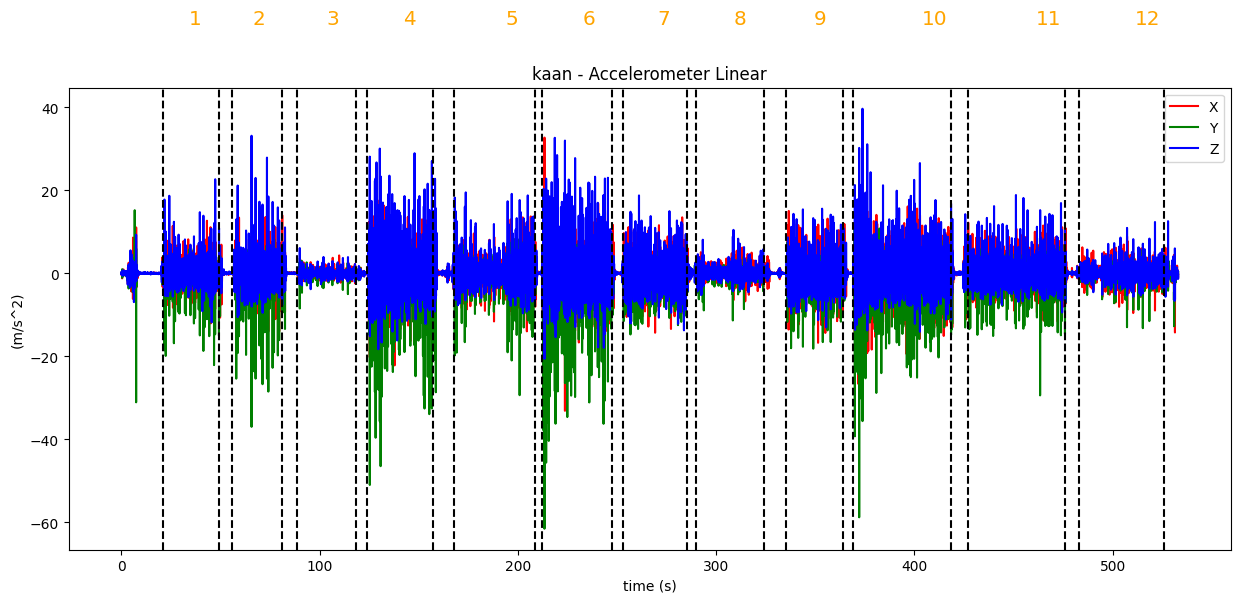

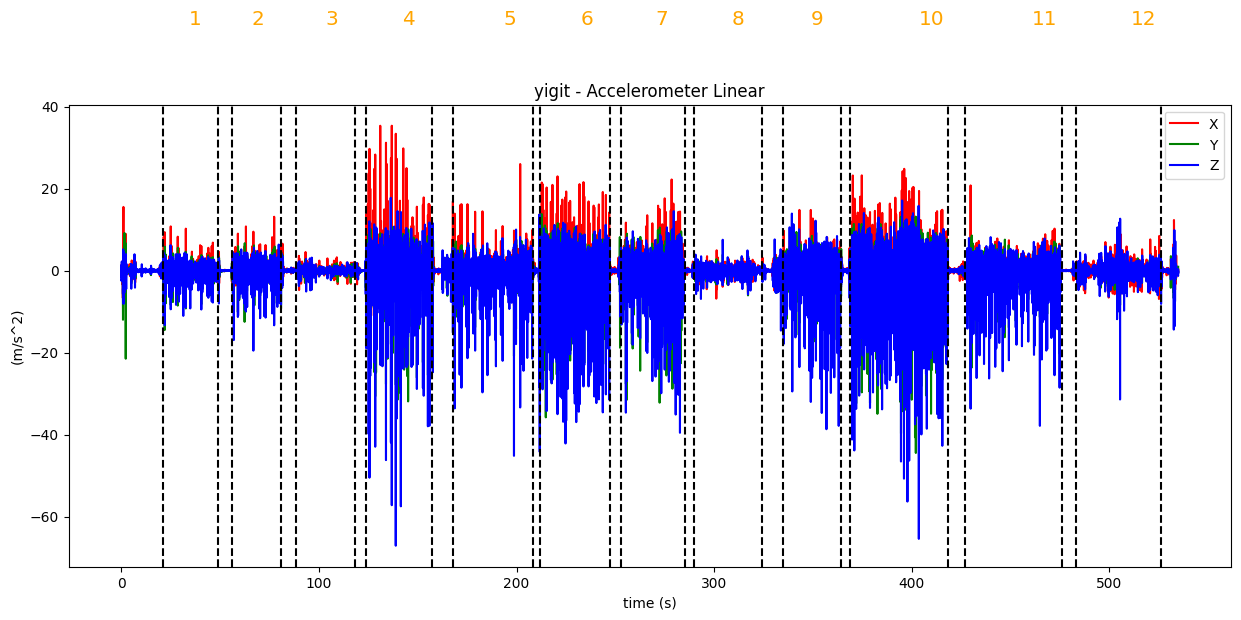

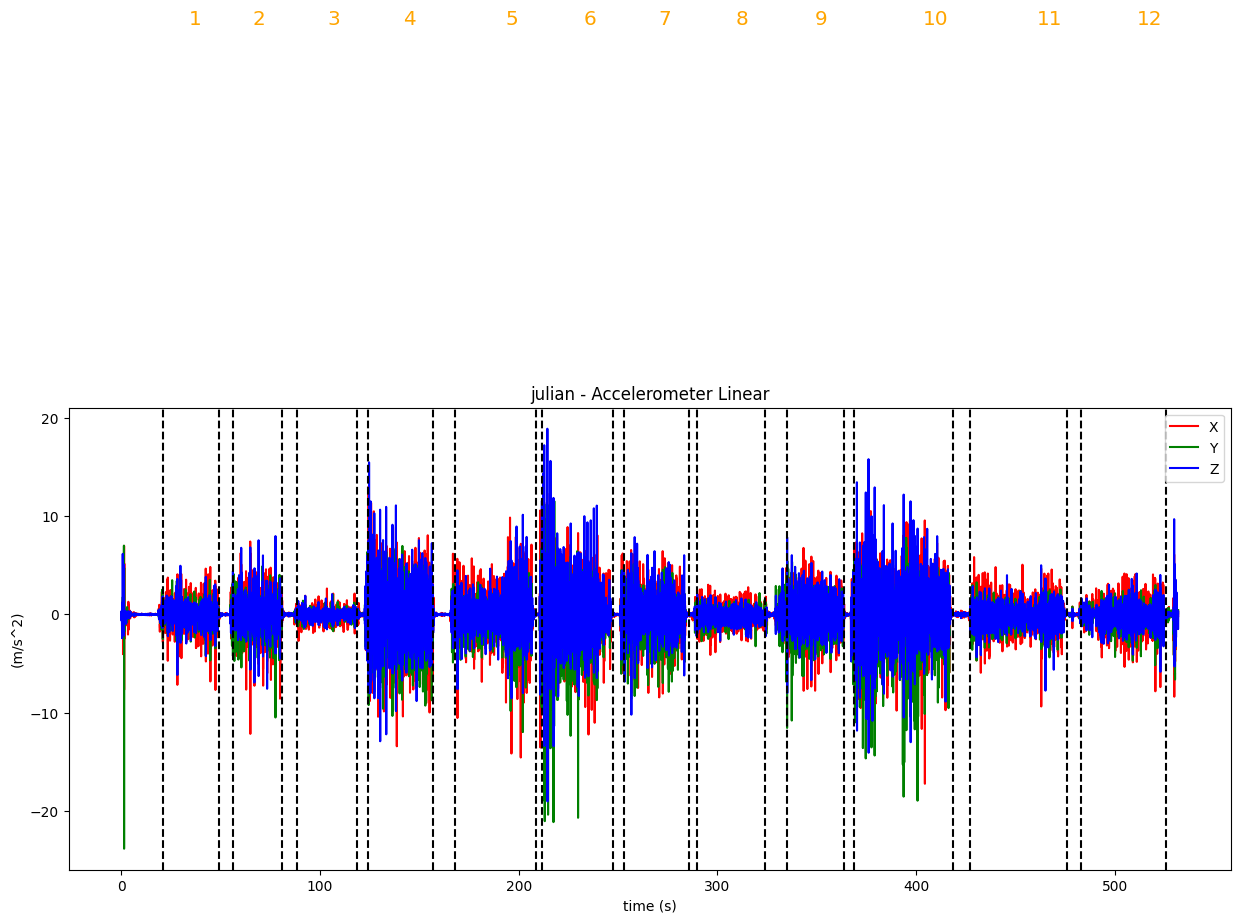

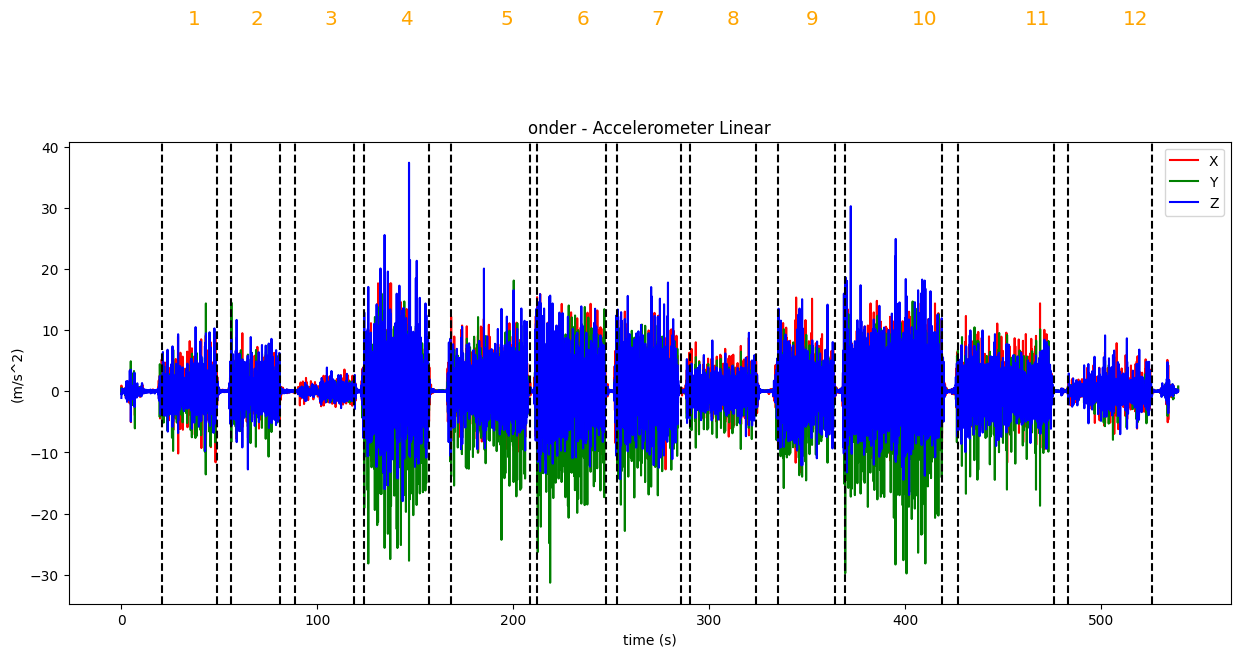

In [ ]:
subject_names = ['kaan','yigit','julian','onder']

for subject_id,SUBJECT in enumerate(subject_names):

    t_start = 21
    DATA_PATH = f".\\data\\working_data\\{SUBJECT}\\"
    INTERVALS = [0, 28, 35, 60, 67.5, 97.5, 103, 136, 147, 187.5, 191, 226.5, 232, 
                264.5, 269, 303, 314, 343, 348, 397.5, 406, 455, 462, 505]

    accelerometer_linear = pd.read_csv(f"{DATA_PATH}Linear Accelerometer.csv")
    gyroscope = pd.read_csv(f"{DATA_PATH}Gyroscope.csv")
    magnetometer = pd.read_csv(f"{DATA_PATH}Magnetometer.csv")

    plt.figure(figsize=(15, 6))
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['X (m/s^2)'], color='r', label='X')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Y (m/s^2)'], color='g', label='Y')
    plt.plot(accelerometer_linear['Time (s)'], accelerometer_linear['Z (m/s^2)'], color='b', label='Z')
    [plt.axvline(x=_x+t_start, ls='--', lw=1.5, c='black') for _x in INTERVALS]
    [plt.text(_x+t_start-15, 60, f"{_y+1}", fontsize='x-large', color='orange') for _x,_y in zip(INTERVALS[1::2], range(12))]
    plt.title(f"{SUBJECT} - Accelerometer Linear")
    plt.xlabel('time (s)')
    plt.ylabel('(m/s^2)')
    plt.legend(loc='upper right')
    # plt.savefig(f"{SUBJECT}_accelerometer_linear.png", bbox_inches='tight')
    # plt.xlim([10, 100])
    plt.show()

    intervals_list = np.array([_x+t_start for _x in INTERVALS])

    merged_df = accelerometer_linear.merge(gyroscope).merge(magnetometer)
    merged_df['name'] = SUBJECT
    merged_df['id'] = subject_id
    merged_df['label'] = 0

    for idx in np.arange(len(intervals_list)//2):
        start = intervals_list[(idx*2)]
        end = intervals_list[(idx*2)+1]
        merged_df.loc[(merged_df['Time (s)']>=start)&(merged_df['Time (s)']<=end),'label'] = idx + 1

    save_pd = merged_df[merged_df['label']!=0]
    save_pd.to_csv(f"id_{subject_id+7}.csv")

In [ ]:
pd_list = []

for subject_id,SUBJECT in enumerate(subject_names):
    tmp = pd.read_csv(f"id_{subject_id+7}.csv",index_col=0)
    pd_list.append(tmp)

In [ ]:
final_pd = pd.concat(pd_list)
final_pd

,Time (s),X (m/s^2),Y (m/s^2),Z (m/s^2),X (rad/s),Y (rad/s),Z (rad/s),X (µT),Y (µT),Z (µT),name,id,label
1393,21.011638,1.267650,-0.476902,-0.046587,-0.450857,0.073489,-0.098916,4.537064,44.435333,-4.159012,kaan,0,1
1394,21.026714,1.276410,-0.229552,0.595513,-0.424310,-0.002184,-0.134532,4.562576,44.370544,-3.925797,kaan,0,1
1395,21.041790,1.230057,-0.064377,1.011319,-0.363332,-0.048760,-0.169086,4.337860,44.494446,-3.632645,kaan,0,1
1396,21.056866,0.867801,0.235820,1.790205,-0.296858,-0.044049,-0.190220,4.244431,44.574493,-3.172379,kaan,0,1
1397,21.071942,0.499190,0.445964,2.123712,-0.234333,-0.017816,-0.192629,4.310760,44.761749,-2.978271,kaan,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17636,525.867694,-0.207616,0.057845,-0.517822,-0.001789,0.069189,0.013138,7.406189,53.706593,3.035645,onder,3,12
17637,525.897511,-0.118698,0.079299,-0.669525,-0.008127,-0.086088,0.013114,7.439819,53.751244,2.555637,onder,3,12
17638,525.927329,-0.151618,0.064472,-0.481747,-0.030110,-0.184305,0.019457,7.522774,53.758938,2.686680,onder,3,12
17639,525.957146,-0.034090,0.046352,-0.072951,-0.045140,-0.121236,0.031856,7.392075,53.766067,2.580425,onder,3,12


In [ ]:
final_pd.columns = ['time','acc_x','acc_y','acc_z','gy_x','gy_y','gy_z','mag_x','mag_y','mag_z','subject_name','subject_id','label']

In [ ]:
final_pd['genre'] = np.where(final_pd['label'].isin([1,5,11]), 'POP',
                             np.where(final_pd['label'].isin([2,7,9]), 'HIPHOP',
                                      np.where(final_pd['label'].isin([3,8,12]), 'SLOW','TECHNO')))

In [ ]:
final_pd.to_csv('data_cleaned_raw_2.csv',index=False)

In [ ]:
final_pd

,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,mag_x,mag_y,mag_z,subject_name,subject_id,label,genre
1393,21.011638,1.267650,-0.476902,-0.046587,-0.450857,0.073489,-0.098916,4.537064,44.435333,-4.159012,kaan,0,1,POP
1394,21.026714,1.276410,-0.229552,0.595513,-0.424310,-0.002184,-0.134532,4.562576,44.370544,-3.925797,kaan,0,1,POP
1395,21.041790,1.230057,-0.064377,1.011319,-0.363332,-0.048760,-0.169086,4.337860,44.494446,-3.632645,kaan,0,1,POP
1396,21.056866,0.867801,0.235820,1.790205,-0.296858,-0.044049,-0.190220,4.244431,44.574493,-3.172379,kaan,0,1,POP
1397,21.071942,0.499190,0.445964,2.123712,-0.234333,-0.017816,-0.192629,4.310760,44.761749,-2.978271,kaan,0,1,POP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17636,525.867694,-0.207616,0.057845,-0.517822,-0.001789,0.069189,0.013138,7.406189,53.706593,3.035645,onder,3,12,SLOW
17637,525.897511,-0.118698,0.079299,-0.669525,-0.008127,-0.086088,0.013114,7.439819,53.751244,2.555637,onder,3,12,SLOW
17638,525.927329,-0.151618,0.064472,-0.481747,-0.030110,-0.184305,0.019457,7.522774,53.758938,2.686680,onder,3,12,SLOW
17639,525.957146,-0.034090,0.046352,-0.072951,-0.045140,-0.121236,0.031856,7.392075,53.766067,2.580425,onder,3,12,SLOW
